In [26]:
from pandas import read_csv, concat, DataFrame
from pandas.plotting import register_matplotlib_converters
from matplotlib.pyplot import figure, savefig
from ds_charts import bar_chart, get_variable_types
from sklearn.impute import SimpleImputer
from numpy import nan

In [27]:
register_matplotlib_converters()
file = 'set1'
filename = 'ew_data/set1_outliers.csv'
data = read_csv(filename, parse_dates=True, infer_datetime_format=True)

,CRASH_TIME,PERSON_AGE,BODILY_INJURY,SAFETY_EQUIPMENT,PERSON_SEX,PERSON_TYPE,PED_LOCATION,CONTRIBUTING_FACTOR_2,EJECTION,COMPLAINT,...,PERSON_ID,CONTRIBUTING_FACTOR_1,POSITION_IN_VEHICLE,PED_ROLE,UNIQUE_ID,PED_ACTION,COLLISION_ID,PERSON_INJURY,CRASH_MONTH,CRASH_DAY
count,45669.000000,45213.000000,45669,32616.000000,45669,45669,6571,6546,39429,43960.000000,...,45669,6558,39448,45669,4.566900e+04,6571,4.566900e+04,45669.000000,45669.000000,45669.000000
unique,NaN,NaN,14,NaN,3,4,4,39,4,NaN,...,45669,39,10,5,NaN,16,NaN,NaN,NaN,NaN
top,NaN,NaN,Back,NaN,M,Occupant,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Unspecified,Not Ejected,NaN,...,06869fa4-85f9-4499-9491-11132224bdce,Unspecified,Driver,Driver,NaN,Crossing With Signal,NaN,NaN,NaN,NaN
freq,NaN,NaN,7505,NaN,27573,32903,3953,5772,35883,NaN,...,1,4675,26053,26542,NaN,2481,NaN,NaN,NaN,NaN
mean,13.445882,36.774401,NaN,7.366599,NaN,NaN,NaN,NaN,NaN,1.364195,...,NaN,NaN,NaN,NaN,1.183588e+07,NaN,4.431737e+06,0.005540,6.270687,15.551008
std,6.434134,16.562875,NaN,4.225738,NaN,NaN,NaN,NaN,NaN,1.329557,...,NaN,NaN,NaN,NaN,1.375828e+05,NaN,2.753403e+04,0.074225,3.078567,8.745930
min,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,1.153725e+07,NaN,4.380715e+06,0.000000,1.000000,1.000000
25%,9.000000,25.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,1.177289e+07,NaN,4.408781e+06,0.000000,4.000000,8.000000
50%,15.000000,34.000000,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,1.185680e+07,NaN,4.432358e+06,0.000000,6.000000,15.000000
75%,18.000000,48.000000,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,2.000000,...,NaN,NaN,NaN,NaN,1.194421e+07,NaN,4.455395e+06,0.000000,9.000000,23.000000


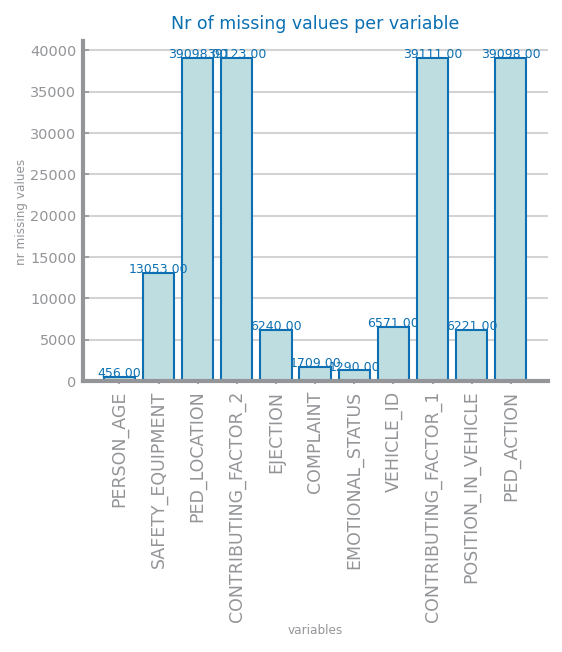

In [28]:
mv = {}
figure()
for var in data:
    nr = data[var].isna().sum()
    if nr > 0:
        mv[var] = nr

bar_chart(list(mv.keys()), list(mv.values()), title='Nr of missing values per variable', xlabel='variables', ylabel='nr missing values', rotation=True)
savefig(f'images/{file}_missing_values_number.png')
data.describe(include='all')

Dropped variables ['PED_LOCATION', 'CONTRIBUTING_FACTOR_2', 'CONTRIBUTING_FACTOR_1', 'PED_ACTION']


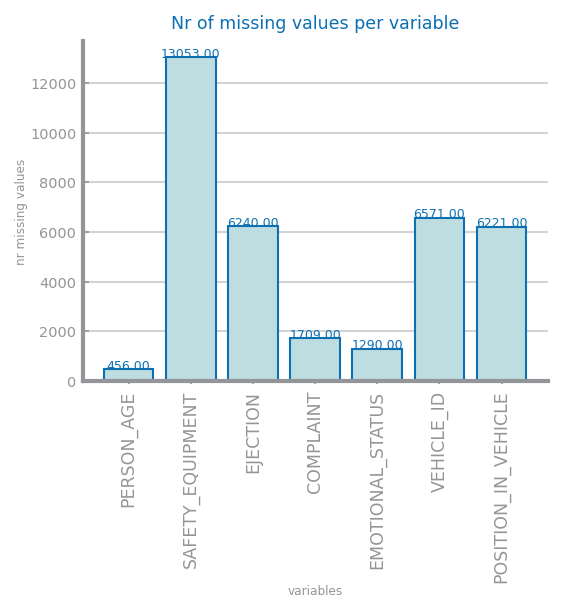

In [29]:
# defines the number of records to discard entire columns
threshold = data.shape[0] * 0.84

missings = [c for c in mv.keys() if mv[c]>threshold]
df_drop_columna = data.drop(columns=missings, inplace=False)
print('Dropped variables', missings)

mv = {}
figure()
for var in df_drop_columna.columns:
    nr = data[var].isna().sum()
    if nr > 0:
        mv[var] = nr

bar_chart(list(mv.keys()), list(mv.values()), title='Nr of missing values per variable', xlabel='variables', ylabel='nr missing values', rotation=True)
savefig(f'images/{file}_missing_values_number_drop_columns.png')

In [30]:

tmp_rest, tmp_nr, tmp_sb = None, None, None
variables_all = df_drop_columna.columns
variables_fill_NA = ['VEHICLE_ID', 'POSITION_IN_VEHICLE', 'EJECTION', 'SAFETY_EQUIPMENT']
variables_fill_mean = ['PERSON_AGE']
variables_rest = [var for var in variables_all if var not in variables_fill_NA + variables_fill_mean]

tmp_rest = df_drop_columna[variables_rest]

imp = SimpleImputer(strategy='constant', fill_value='NA', missing_values=nan, copy=True)
tmp_sb = DataFrame(imp.fit_transform(df_drop_columna[variables_fill_NA]), columns=variables_fill_NA)

mean_age = round(df_drop_columna['PERSON_AGE'].mean(),0)
imp = SimpleImputer(strategy='constant', fill_value=mean_age, missing_values=nan, copy=True)
tmp_nr = DataFrame(imp.fit_transform(df_drop_columna[variables_fill_mean]), columns=variables_fill_mean)

df_filled_NA = concat([tmp_rest, tmp_nr, tmp_sb], axis=1)
df_filled_NA.to_csv(f'ew_data/{file}_mv.csv', index=False)
df_filled_NA.describe(include='all')
df_filled_NA

,CRASH_TIME,BODILY_INJURY,PERSON_SEX,PERSON_TYPE,COMPLAINT,EMOTIONAL_STATUS,PERSON_ID,PED_ROLE,UNIQUE_ID,COLLISION_ID,PERSON_INJURY,CRASH_MONTH,CRASH_DAY,PERSON_AGE,VEHICLE_ID,POSITION_IN_VEHICLE,EJECTION,SAFETY_EQUIPMENT
0,0,Neck,M,Occupant,1.0,10.0,06869fa4-85f9-4499-9491-11132224bdce,Driver,11537291,4380715,0,1,1,37.0,19821967.0,Driver,Not Ejected,10.0
1,0,Shoulder - Upper Arm,M,Occupant,1.0,10.0,1d4a21e7-1ccd-488d-bcfa-5e144a7d9a36,Driver,11539900,4381080,0,1,1,22.0,19823516.0,Driver,Not Ejected,10.0
2,0,Elbow-Lower-Arm-Hand,M,Pedestrian,2.0,10.0,7fe0f832-49c1-4c5c-879e-1e1e98d49b8c,Pedestrian,11540318,4381325,0,1,1,43.0,NA,NA,NA,NA
3,0,Neck,F,Occupant,1.0,10.0,500d8914-149f-4eed-918f-30664916f21d,Passenger,11537289,4380715,0,1,1,68.0,19821967.0,"Front passenger, if two or more persons, inclu...",Not Ejected,10.0
4,0,Neck,M,Occupant,1.0,10.0,4932796e-b59d-417f-bafb-3f2c9bbb9e1f,Driver,11541732,4381682,0,1,1,22.0,19824561.0,Driver,Not Ejected,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45664,21,Knee-Lower Leg Foot,F,Occupant,NaN,10.0,18465142-6546-4acb-8150-81a3a8eac7eb,Driver,12029258,4478379,0,11,16,28.0,20108649.0,Driver,Not Ejected,10.0
45665,22,Head,M,Other Motorized,10.0,10.0,15318ca9-4068-44fb-a214-8741e98b34ea,Passenger,12030319,4478824,0,11,16,25.0,20109268.0,"Middle rear seat, or passenger lying across a ...",Ejected,NA
45666,22,Knee-Lower Leg Foot,F,Occupant,6.0,10.0,b8a51aa1-53c7-4207-80ee-b9d24d7a8c78,Driver,12030015,4478367,0,11,16,30.0,20109092.0,Driver,Not Ejected,10.0
45667,22,Neck,M,Occupant,1.0,10.0,226f89e5-5dfa-4f81-8e4d-d74b125b6ae0,Driver,12028436,4478081,0,11,16,62.0,20108198.0,Driver,Not Ejected,10.0
